# Predição de Classificação de Filme / *Movie Rating Prediction*

# Desafio de Ciência de Dados / *Data Science Challenge*

# Entrega / *Delivery*: Notebook

# Desenvolvedor / *Developer*: Solano Jacon

In [5]:
# The installation of the openpyxl library would be necessary for the command pd.read_excel(file, engine='openpyxl') to work

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import warnings
from IPython.display import Image, display
from sklearn.preprocessing import OneHotEncoder
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Leitura dos dados / Data reading

In [6]:
# Importação dos dados sem nenhum tratamento prévio
# Import of data without any previous treatment

data_raw = pd.read_excel('data/dataset_netflix.xlsx', engine='openpyxl')
data_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019.0,41.0,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016.0,52.0,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013.0,82.0,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016.0,64.0,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017.0,57.0,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [7]:
# Verificação dos tipos e valores nulos dos dados
# Checking data types and null values

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4264 non-null   object        
 4   cast          6233 non-null   object        
 5   country       6233 non-null   object        
 6   date_added    6222 non-null   datetime64[ns]
 7   release_year  6233 non-null   float64       
 8   rating        6233 non-null   float64       
 9   duration      6233 non-null   object        
 10  listed_in     6233 non-null   object        
 11  description   6233 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 584.6+ KB


## Tratamento dos dados / *Data processing*

In [8]:
# Eliminação dos filmes sem classificação, e verificação dos tipos e valores nulos dos dados
# Elimination of unrated movies, and verification of data types and null values

data = data_raw.copy()
data = data.dropna(subset=['rating']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6233 entries, 0 to 6232
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6233 non-null   int64         
 1   type          6233 non-null   object        
 2   title         6233 non-null   object        
 3   director      4264 non-null   object        
 4   cast          6233 non-null   object        
 5   country       6233 non-null   object        
 6   date_added    6222 non-null   datetime64[ns]
 7   release_year  6233 non-null   float64       
 8   rating        6233 non-null   float64       
 9   duration      6233 non-null   object        
 10  listed_in     6233 non-null   object        
 11  description   6233 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 584.5+ KB


In [9]:
# Verificação dos valores únicos da coluna type
# Checking the unique values of the type column

data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
# Verificação dos valores únicos da coluna duration
# Checking the unique values of the duration column

data['duration'].unique()

array(['90 min', '94 min', '1 Season', '99 min', '110 min', '60 min',
       '78 min', '95 min', '58 min', '62 min', '65 min', '61 min',
       '135 min', '98 min', '96 min', '79 min', '113 min', '80 min',
       '77 min', '112 min', '106 min', '102 min', '114 min', '125 min',
       '142 min', '133 min', '100 min', '86 min', '146 min', '10 min',
       '122 min', '126 min', '116 min', '130 min', '70 min', '128 min',
       '88 min', '108 min', '93 min', '64 min', '107 min', '92 min',
       '111 min', '103 min', '40 min', '85 min', '72 min', '45 min',
       '89 min', '24 min', '127 min', '163 min', '117 min', '42 min',
       '104 min', '75 min', '82 min', '38 min', '97 min', '81 min',
       '91 min', '152 min', '87 min', '121 min', '101 min', '119 min',
       '83 min', '182 min', '124 min', '63 min', '139 min', '171 min',
       '84 min', '69 min', '76 min', '41 min', '153 min', '141 min',
       '52 min', '137 min', '132 min', '157 min', '109 min', '105 min',
       '25 min', '71

In [11]:
# Verificação dos mínimos e máximos das colunas release_year e rating
# Verification of the minimum and maximum of the release_year and rating columns

data[['release_year', 'rating']].describe()

,release_year,rating
count,6233.000000,6233.000000
mean,2013.370448,64.127547
std,8.768412,19.013894
min,1925.000000,0.000000
25%,2013.000000,59.000000
50%,2016.000000,68.000000
75%,2018.000000,76.000000
max,2020.000000,97.000000


In [12]:
# Aplicação de encoder na coluna type
# Encoder application on type column

ohe_type = OneHotEncoder(sparse = False)
type_encoded = ohe_type.fit_transform(data[['type']])
data['type_e_' + ohe_type.categories_[0]] = type_encoded

In [13]:
# Verificação das categorias do encoder na coluna type
# Checking the encoder categories in the type column

ohe_type.categories_

[array(['Movie', 'TV Show'], dtype=object)]

In [14]:
# Relação das colunas atuais da tabela
# List of current table columns

data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type_e_Movie', 'type_e_TV Show'],
      dtype='object')

In [15]:
# Verificação das colunas criadas a partir do encoder na coluna type
# Check the columns created from the encoder in the type column

data[['type', 'type_e_Movie', 'type_e_TV Show']].head()

,type,type_e_Movie,type_e_TV Show
0,Movie,1.0,0.0
1,Movie,1.0,0.0
2,TV Show,0.0,1.0
3,TV Show,0.0,1.0
4,Movie,1.0,0.0


In [16]:
# Função para converter letras maiúsculas do texto em minúsculas
# Function to convert uppercase letters of text to lowercase

def lowercase(text): 
    lowercased = text.lower() 
    return lowercased

In [17]:
# Função para remover números do texto
# Function to remove numbers from text

def remove_numbers(text):
    words_only = ''.join([i for i in text if not i.isdigit()])
    return words_only

In [18]:
# Função para remover pontuação do texto
# Function to remove punctuation from text

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [19]:
# Função para remover pontuação do texto exceto vírgula
# Function to remove punctuation from text except comma

punctuation_wo_comma = string.punctuation.replace(',', '')

def remove_punctuation_except_comma(text):
    for punctuation in punctuation_wo_comma:
        text = text.replace(punctuation, '')
    return text

In [20]:
# Função para extrair os números da coluna duration
# Function to extract the numbers from the duration column

def extract_duration_numbers(text, unit):
    numbers_only = int(text[:text.find(' ')])
    unit_only = text[(text.find(' ') + 1):]
    if (unit == 'minutes' and unit_only == 'min') or (unit == 'seasons' and unit_only[:6] == 'Season'):
        return numbers_only
    else:
        return 0

In [21]:
# Função para remover stop words do texto
# Function to remove stop words from text

stop_words = set(stopwords.words('english')) 

def remove_stopwords(text):
    tokenized = word_tokenize(text)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords

In [22]:
# Função para padronizar as palavras do texto
# Function to standardize the words of the text

def lemma(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string

In [23]:
# Aplicação dos tratamentos específicos para texto nas colunas de acordo com a necessidade
# Application of specific treatments for text in columns as needed

# Coluna director
# Column director
data['director'] = data['director'].dropna().apply(lambda x: lowercase(x))
data['director'] = data['director'].dropna().apply(lambda x: remove_numbers(x))
data['director'] = data['director'].dropna().apply(lambda x: remove_punctuation_except_comma(x))
# Coluna cast
# Column cast
data['cast'] = data['cast'].apply(lambda x: '' if x == 'bam' else x)
data['cast'] = data['cast'].dropna().apply(lambda x: lowercase(x))
data['cast'] = data['cast'].dropna().apply(lambda x: remove_numbers(x))
data['cast'] = data['cast'].dropna().apply(lambda x: remove_punctuation_except_comma(x))
# Coluna country
# Column country
data['country'] = data['country'].apply(lambda x: '' if x == 'none' else x)
data['country'] = data['country'].dropna().apply(lambda x: lowercase(x))
data['country'] = data['country'].dropna().apply(lambda x: remove_numbers(x))
data['country'] = data['country'].dropna().apply(lambda x: remove_punctuation_except_comma(x))
# Coluna rating
# Column rating
data['rating'] = data['rating'].apply(lambda x: round(x / 10))
# Coluna duration
# Column duration
data['duration'] = data['duration'].dropna().apply(lambda x: lowercase(x))
data['duration'] = data['duration'].dropna().apply(lambda x: remove_punctuation(x))
data['duration_minutes'] = data['duration'].dropna().apply(lambda x: extract_duration_numbers(x, 'minutes'))
data['duration_seasons'] = data['duration'].dropna().apply(lambda x: extract_duration_numbers(x, 'seasons'))
# Coluna listed_in
# Column listed_in
data['listed_in'] = data['listed_in'].dropna().apply(lambda x: lowercase(x))
data['listed_in'] = data['listed_in'].dropna().apply(lambda x: remove_numbers(x))
data['listed_in'] = data['listed_in'].dropna().apply(lambda x: remove_punctuation_except_comma(x))
# Coluna description
# Column description
data['description'] = data['description'].dropna().apply(lambda x: lowercase(x))
data['description'] = data['description'].dropna().apply(lambda x: remove_numbers(x))
data['description'] = data['description'].dropna().apply(lambda x: remove_punctuation(x))
data['description'] = data['description'].dropna().apply(lambda x: remove_stopwords(x))
data['description'] = data['description'].dropna().apply(lambda x: lemma(x))

In [24]:
# Apresentação da tabela tratada
# Presentation of the treated table

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_e_Movie,type_e_TV Show,duration_minutes,duration_seasons
0,81145628,Movie,Norm of the North: King Sized Adventure,"richard finn, tim maltby","alan marriott, andrew toth, brian dobson, cole...","united states, india, south korea, china",2019-09-09,2019.0,4,90 min,"children family movies, comedies",planning awesome wedding grandfather polar bea...,1.0,0.0,90,0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,jandino asporaat,united kingdom,2016-09-09,2016.0,5,94 min,standup comedy,jandino asporaat riff challenge raising kid se...,1.0,0.0,94,0
2,70234439,TV Show,Transformers Prime,NaN,"peter cullen, sumalee montano, frank welker, j...",united states,2018-09-08,2013.0,8,1 season,kids tv,help three human ally autobots protect earth o...,0.0,1.0,0,0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"will friedle, darren criss, constance zimmer, ...",united states,2018-09-08,2016.0,6,1 season,kids tv,prison ship crash unleashes hundred decepticon...,0.0,1.0,0,0
4,80125979,Movie,#realityhigh,fernando lebrija,"nesta cooper, kate walsh, john michael higgins...",united states,2017-09-08,2017.0,6,99 min,comedies,nerdy high schooler dani finally attracts inte...,1.0,0.0,99,0


## Feature engineering / *Feature engineering*

In [25]:
# Geração da matriz de importância por diretor a partir da coluna director
# Generation of the importance matrix by director from the director column

tf_idf_vectorizer = TfidfVectorizer(strip_accents='unicode', token_pattern=r"(?u)[a-zA-Z][a-z ]+")

X = tf_idf_vectorizer.fit_transform(data['director'].fillna(''))

director_vectorized = pd.DataFrame(X.toarray(), columns=tf_idf_vectorizer.get_feature_names())
director_vectorized.head()

,a l vijay,a salaam,aadish keluskar,aamir bashir,aamir khan,aanand rai,aaron burns,aaron hancox,aaron hann,aaron moorhead,...,zak hilditch,zakariya,zatella beatty,zeke norton,zhang yimou,ziga virc,zoe berriatua,zoe listerjones,zoya akhtar,zune kwok
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Geração da matriz de importância por ator a partir da coluna cast
# Generation of the importance matrix per actor from the cast column

tf_idf_vectorizer = TfidfVectorizer(strip_accents='unicode', token_pattern=r"(?u)[a-zA-Z][a-z ]+")

X = tf_idf_vectorizer.fit_transform(data['cast'].fillna(''))

cast_vectorized = pd.DataFrame(X.toarray(), columns=tf_idf_vectorizer.get_feature_names())
cast_vectorized.head()

,a boogie wit tha hoodie,a murat ozgen,aabhas yadav,aachal munjal,aadarsh balakrishna,aadhi,aaditi pohankar,aaditya pratap singh,aadukalam naren,aadya bedi,...,zul vellani,zulay henao,zurawski,zuzanna szadkowski,zwelakhe mtsaka,zydrunas savickas,zygmunt hubner,zygmunt zintel,zynnell zuh,zyon allen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Geração da matriz de importância por país a partir da coluna country
# Generation of the importance matrix by country from the country column

tf_idf_vectorizer = TfidfVectorizer(strip_accents='unicode', token_pattern=r"(?u)[a-zA-Z][a-z ]+")

X = tf_idf_vectorizer.fit_transform(data['country'].fillna(''))

country_vectorized = pd.DataFrame(X.toarray(), columns=tf_idf_vectorizer.get_feature_names())
country_vectorized.head()

,afghanistan,albania,argentina,armenia,australia,austria,azerbaijan,bangladesh,belgium,bermuda,...,ukraine,united arab emirates,united kingdom,united states,uruguay,vatican city,venezuela,vietnam,west germany,zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.244531,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Geração da matriz de importância por categoria a partir da coluna listed_in
# Generation of the importance matrix by category from the column listed_in

tf_idf_vectorizer = TfidfVectorizer(strip_accents='unicode', token_pattern=r"(?u)[a-zA-Z][a-z ]+")

X = tf_idf_vectorizer.fit_transform(data['listed_in'].fillna(''))

listed_in_vectorized = pd.DataFrame(X.toarray(), columns=tf_idf_vectorizer.get_feature_names())
listed_in_vectorized.head()

,action adventure,anime features,anime series,british tv shows,children family movies,classic cult tv,classic movies,comedies,crime tv shows,cult movies,...,teen tv shows,thrillers,tv action adventure,tv comedies,tv dramas,tv horror,tv mysteries,tv scifi fantasy,tv shows,tv thrillers
0,0.0,0.0,0.0,0.0,0.812963,0.0,0.0,0.582315,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Geração da matriz de importância por palavra a partir da coluna description
# Generation of the word importance matrix from the description column

tf_idf_vectorizer = TfidfVectorizer(strip_accents='unicode')

X = tf_idf_vectorizer.fit_transform(data['description'].fillna(''))

description_vectorized = pd.DataFrame(X.toarray(), columns=tf_idf_vectorizer.get_feature_names())
description_vectorized.head()

,aamir,aardman,aaron,abad,abagnale,abandon,abandoned,abandoning,abandonment,abargil,...,zone,zoologist,zordon,zorro,zoya,zuhu,zulu,zumbo,zurich,łukasz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Relação das colunas atuais da tabela
# List of current table columns

data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type_e_Movie', 'type_e_TV Show', 'duration_minutes',
       'duration_seasons'],
      dtype='object')

In [31]:
# Montagem da matriz das features do modelo
# Assembly of the model features matrix

X = data[['release_year', 'type_e_Movie', 'type_e_TV Show', 'duration_minutes', 'duration_seasons']]
X = pd.concat([X, director_vectorized], axis=1)
X = pd.concat([X, cast_vectorized], axis=1)
X = pd.concat([X, country_vectorized], axis=1)
X = pd.concat([X, listed_in_vectorized], axis=1)
X = pd.concat([X, description_vectorized], axis=1)
X

del director_vectorized
del cast_vectorized
del country_vectorized
del listed_in_vectorized
del description_vectorized

In [32]:
# Montagem do vetor do target do modelo
# Assembly of the model's target vector

y = data['rating']
y

0       4
1       5
2       8
3       6
4       6
       ..
6228    9
6229    8
6230    6
6231    8
6232    9
Name: rating, Length: 6233, dtype: int64

In [33]:
del data

## Divisão dos dados entre treino e teste / *Splitting the data between training and testing*

In [34]:
# Separação dos dados em 70% para treino do modelo e 30% para teste
# Data separation in 70% for training the model and 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

del X
del y

In [35]:
# Cálculo da performance Accuracy do modelo sobre os dados de treino
# Calculation of the model's Accuracy performance on the training data

cv_nb = cross_validate(MultinomialNB(), X_train, y_train, scoring ='accuracy')

cv_nb['test_score'].mean()

0.33554809420221315

In [36]:
# Treino do modelo e registro de suas predições sobre os dados de teste bem como das probabilidades destas predições
# Training the model and recording its predictions on the test data as well as the probabilities of these predictions

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)

## Matriz de Confusão e gráfico de Precision e Recall do seu modelo com os dados de teste / *Confusion Matrix and Precision and Recall plot of your model with test data*

In [37]:
# Apresentação da matriz de confusão solicitada dos dados de teste
# Presentation of the requested confusion matrix of the test data

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[  0   0   0   0   0   6  42  62   0   0]
 [  0   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   1  15   2   0   0]
 [  0   0   0   0   0   5  68  11   0   0]
 [  0   0   0   0   0  18 110  30   0   0]
 [  0   0   0   0   0  45 315  90   0   0]
 [  0   0   0   0   0  63 293 164   0   0]
 [  0   0   0   0   0  70 156 241   0   0]
 [  0   0   0   0   0   6  11  42   0   0]
 [  0   0   0   0   0   0   0   2   0   0]]


In [38]:
# Cálculo das métricas de performance do modelo sobre os dados de teste
# Calculation of model performance metrics on test data

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.31

Micro Precision: 0.31
Micro Recall: 0.31
Micro F1-score: 0.31

Macro Precision: 0.09
Macro Recall: 0.12
Macro F1-score: 0.10

Weighted Precision: 0.22
Weighted Recall: 0.31
Weighted F1-score: 0.25


In [39]:
# Cálculo das métricas de performance do modelo sobre os dados de teste
# Calculation of model performance metrics on test data

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Rating 0-5', 'Rating 6-15', 'Rating 16-25', 'Rating 26-35', 'Rating 36-45',
                                                          'Rating 46-55', 'Rating 56-65', 'Rating 66-75', 'Rating 76-85', 'Rating 86-95']))


Classification Report

              precision    recall  f1-score   support

  Rating 0-5       0.00      0.00      0.00       110
 Rating 6-15       0.00      0.00      0.00         2
Rating 16-25       0.00      0.00      0.00        18
Rating 26-35       0.00      0.00      0.00        84
Rating 36-45       0.00      0.00      0.00       158
Rating 46-55       0.21      0.10      0.14       450
Rating 56-65       0.29      0.56      0.38       520
Rating 66-75       0.37      0.52      0.43       467
Rating 76-85       0.00      0.00      0.00        59
Rating 86-95       0.00      0.00      0.00         2

    accuracy                           0.31      1870
   macro avg       0.09      0.12      0.10      1870
weighted avg       0.22      0.31      0.25      1870



In [40]:
# Montagem da matriz de probabilidade dos targets dos dados de teste
# Assembly of the probability matrix of test data targets

y_test_proba = pd.DataFrame(y_test).reset_index(drop=True)

n_classes = 10

for i in range(n_classes):
    y_test_proba.loc[y_test_proba['rating'] == i, i] = 1

y_test_proba = y_test_proba.drop(columns='rating').fillna(0)
y_test_proba = np.array(y_test_proba)
y_test_proba

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

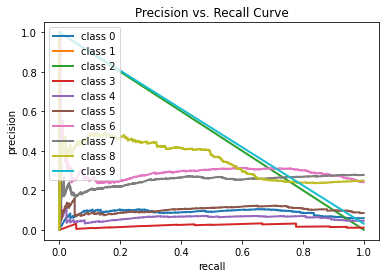

In [41]:
# Montagem do gráfico de precision e recall solicitado
# Assembly of the requested precision and recall graph

n_classes = 10
precision = dict()
recall = dict()
threshold = dict()

for i in range(n_classes):
    precision[i], recall[i], threshold[i] = precision_recall_curve(y_test_proba[:, i], y_pred_proba[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("Precision vs. Recall Curve")
plt.show()

In [42]:
# Montagem de comparativo entre quantidade de registros por target dos dados de teste reais e preditos
# Comparison between number of records per target of actual and predicted test data

test1 = pd.DataFrame(pd.DataFrame(y_test).value_counts())
test1.columns = ['actual']
test1 = test1.reset_index()
test2 = pd.DataFrame(pd.DataFrame(y_pred).value_counts())
test2.columns = ['predicted']
test2 = test2.reset_index()
test2.columns = ['rating', 'predicted']
test = test1.merge(test2, how='outer', on='rating').fillna(0)
test['predicted'] = test['predicted'].astype('int64')
test = test.sort_values(by=['rating']).set_index('rating')
test

,actual,predicted
rating,,
0,110,0
2,2,0
3,18,0
4,84,0
5,158,0
6,450,214
7,520,1012
8,467,644
9,59,0


## Tendo em vista o resultado final, relacionar as oportunidades de melhoria para esse modelo / *Bearing in mind the final result, list the improvement opportunities for this model*

- Balanceamento dos dados de treino do modelo com base na quantidade de filmes por classe de rating, de forma que cada classe possua a mesma quantidade de filmes para treino.
- Agrupar ainda mais as classes do rating (atualmente em 10, para 5 por exemplo).
- Verificar com o cliente a possibilidade de fornecer mais dados destes filmes, além dos já fornecidos (type, director, cast e country por exemplo).
- Verificar com o cliente a possibilidade de fornecer dados de mais filmes, além dos já fornecidos.


- *Balancing the training data of the model based on the number of films per rating class, so that each class has the same number of films for training.*
- *Group rating classes even more (currently at 10, to 5 for example).*
- *Check with the customer the possibility of providing more data on these films, in addition to those already provided (type, director, cast and country for example).*
- *Check with the customer the possibility of providing data for more films, in addition to those already provided.*

## Fim / *End*